# Cost of Food Waste EDA

## Food Waste Costs by Category DataSet
This code calculates the waste share and household-level costs of food waste by category using data from the EPA 2023 report: Estimating the Cost of Food Waste to American Consumers.
- Annual cost per person comes directly from EPA Table 2.
- Waste share percent is calculated as (category cost ÷ total cost) × 100.
- Annual cost per household assumes an average U.S. household size of 2.5 (Census Bureau).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annual per capita consumer-level food waste and cost of food waste by category
data = {
    "category": [
        "Meat", "Other dairy", "Processed fruit", "Fish and seafood", 
        "Fresh vegetables", "Added sugar and sweeteners", "Poultry", 
        "Fresh fruit", "Grain products", "Processed vegetables", 
        "Added fats and oils", "Fluid milk", "Eggs", "Tree nuts and peanuts"
    ],
    "annual_cost_per_person": [
        133.48, 74.32, 65.86, 61.33, 
        59.49, 57.66, 55.81, 
        44.58, 42.41, 39.35, 
        37.75, 25.68, 20.07, 10.34
    ]
}

# Total per-capita cost 
total_per_capita = 728.14

# Convert to dataframe
df = pd.DataFrame(data)

# Compute waste_share and annual_cost_per_household (using avg household size = 2.5)
df["waste_share_percent"] = ((df["annual_cost_per_person"] / total_per_capita) * 100).round(2)
df["annual_cost_per_household"] = (df["annual_cost_per_person"] * 2.5).round(2)

df


,category,annual_cost_per_person,waste_share_percent,annual_cost_per_household
0,Meat,133.48,18.33,333.70
1,Other dairy,74.32,10.21,185.80
2,Processed fruit,65.86,9.04,164.65
3,Fish and seafood,61.33,8.42,153.32
4,Fresh vegetables,59.49,8.17,148.72
5,Added sugar and sweeteners,57.66,7.92,144.15
6,Poultry,55.81,7.66,139.52
7,Fresh fruit,44.58,6.12,111.45
8,Grain products,42.41,5.82,106.02
9,Processed vegetables,39.35,5.40,98.38


## Descriptive Statistics
### Average, minimum, and maximum costs across categories.
Depicts the spread of household food waste expenses.

In [4]:
# Display statistics
desc_stats = df[["annual_cost_per_person", "annual_cost_per_household"]].describe()
desc_stats

,annual_cost_per_person,annual_cost_per_household
count,14.000000,14.000000
mean,52.009286,130.022857
std,29.712603,74.280604
min,10.340000,25.850000
25%,38.150000,95.380000
50%,50.195000,125.485000
75%,60.870000,152.170000
max,133.480000,333.700000


In [5]:
# Print summary
avg_cost = df["annual_cost_per_household"].mean()
max_row = df.loc[df["annual_cost_per_household"].idxmax()]
min_row = df.loc[df["annual_cost_per_household"].idxmin()]

print(f"- The average household cost is about ${avg_cost:.2f}.")
print(f"- The highest category is {max_row['category']} at about ${max_row['annual_cost_per_household']:.2f}.")
print(f"- The lowest category is {min_row['category']} at about ${min_row['annual_cost_per_household']:.2f}.")

- The average household cost is about $130.02.
- The highest category is Meat at about $333.70.
- The lowest category is Tree nuts and peanuts at about $25.85.


## Visualizations
### Annual Cost of Food Wasted per Person by Category Bar Chart
Highlights which food categories are most costly for the average person annually.

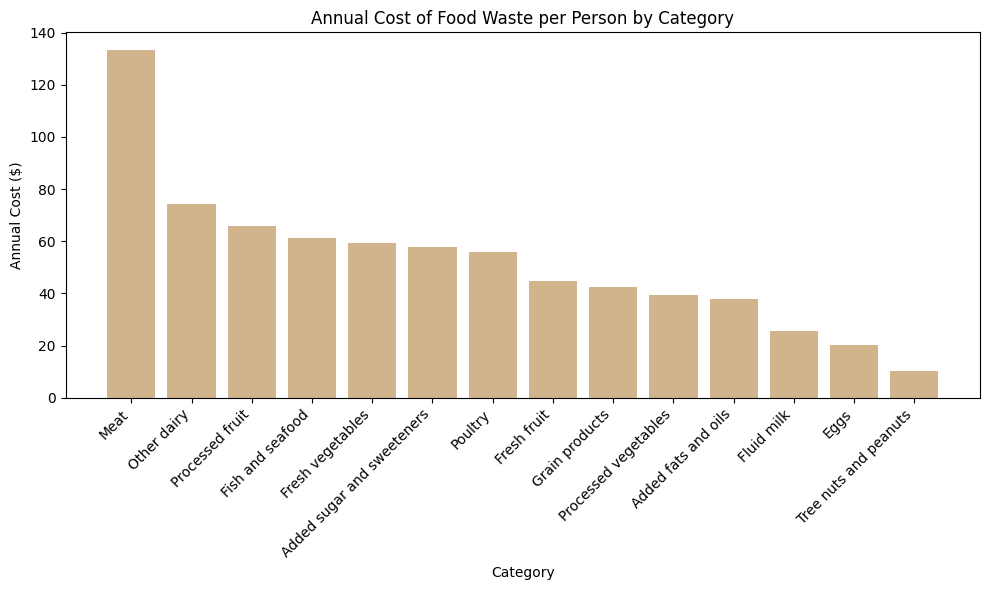

In [6]:
# Plot bar chart of annual cost of food Wasted per person by category
plt.figure(figsize=(10,6))
plt.bar(df["category"], df["annual_cost_per_person"], color="tan")
plt.title("Annual Cost of Food Waste per Person by Category")
plt.xlabel("Category")
plt.ylabel("Annual Cost ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Waste Shares Pie Chart
Shows the proportional share of each category in total food waste.

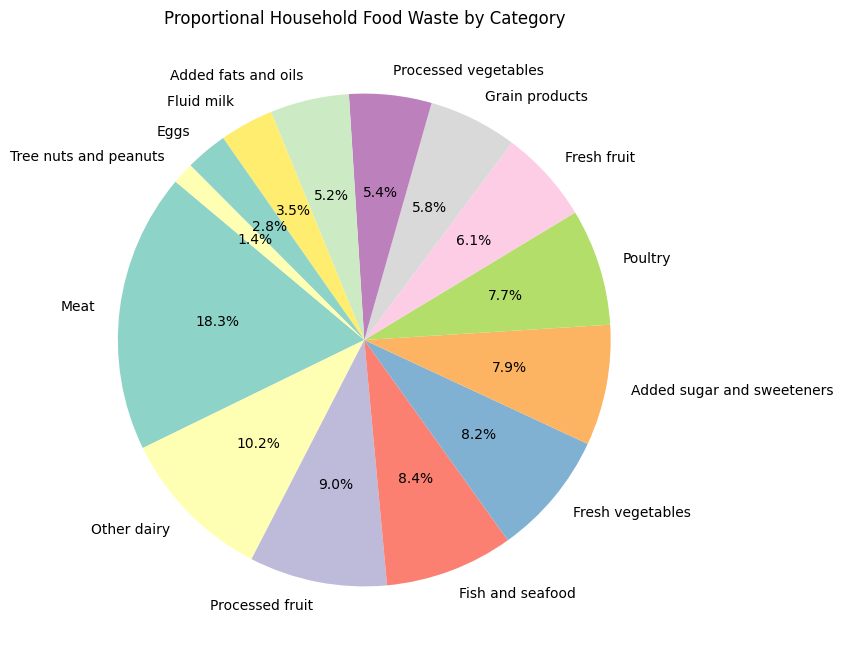

In [7]:
# Plot pie chart of waste share in each category
palette = sns.color_palette('Set3') 
plt.figure(figsize=(8,8))
plt.pie(df["waste_share_percent"], labels=df["category"], autopct="%.1f%%", colors=palette, startangle=140)
plt.title("Proportional Household Food Waste by Category")
plt.show()

## Insights
- The top 3 categories (Meat, Other Dairy, Processed Fruit) account for ~41.5% of total household food waste costs.  
- This means nearly half of annual household losses come from just a few categories.  
- Families could save the most money by focusing on reducing waste from Meat, Other Dairy, and Processed Fruit.  